In [1]:
# Load libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 50
%precision 3

plt.rcParams['figure.figsize']=(16,4)

In [2]:
# Load helper methods for data preprocessing
%run util.py

### Load and explore data

In [3]:
df = pd.read_csv('./data/foreveralone.csv')
df.head()

,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,5/17/2016 20:04:18,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,mechanical drafter,Associate degree,None
1,5/17/2016 20:04:30,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,-,"Some college, no degree",join clubs/socual clubs/meet ups
2,5/17/2016 20:04:58,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,No,10.0,Yes,Yes,I don't want help,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise
3,5/17/2016 20:08:01,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,8.0,Yes,Yes,date coaching,No,A student,student,"Some college, no degree",Joined a gym/go to the gym
4,5/17/2016 20:08:04,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,10.0,No,Yes,I don't want help,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",None


In [4]:
df.describe()

,age,friends
count,469.000000,469.000000
mean,23.963753,7.956716
std,6.023526,34.371500
min,12.000000,0.000000
25%,20.000000,1.000000
50%,23.000000,3.000000
75%,26.000000,7.000000
max,70.000000,600.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 19 columns):
time                     469 non-null object
gender                   469 non-null object
sexuallity               469 non-null object
age                      469 non-null int64
income                   469 non-null object
race                     469 non-null object
bodyweight               469 non-null object
virgin                   469 non-null object
prostitution_legal       469 non-null object
pay_for_sex              469 non-null object
friends                  469 non-null float64
social_fear              469 non-null object
depressed                469 non-null object
what_help_from_others    469 non-null object
attempt_suicide          469 non-null object
employment               469 non-null object
job_title                461 non-null object
edu_level                469 non-null object
improve_yourself_how     469 non-null object
dtypes: float64(1), int64(1), object(17)

In [6]:
# Target variable
df['attempt_suicide'].value_counts()

No     384
Yes     85
Name: attempt_suicide, dtype: int64

### Data preprocessing

In [7]:
count_rows_with_nan_values(df)

8

In [8]:
_df = pd.read_csv('./data/foreveralone.csv')
df = preprocess_dataframe(_df, columns_to_drop=['time', 'what_help_from_others', 'job_title', 'improve_yourself_how'])
X, y = convert_dataframe_to_vectors(df, target_variable='attempt_suicide_Yes', target_variables=['attempt_suicide_No', 'attempt_suicide_Yes'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Train model

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

## Evaluate model

In [10]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("training set score: %f" % train_score)
print("test set score:     %f" % test_score)

training set score: 0.980057
test set score:     0.847458


In [11]:
from sklearn import metrics

expected = y_test
predicted = model.predict(X_test)

report = metrics.classification_report(expected, predicted)

print("CLASSIFICATION REPORT")
print(report)

CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.86      0.98      0.92       101
          1       0.33      0.06      0.10        17

avg / total       0.78      0.85      0.80       118



In [12]:
target_variables = ['attempt_suicide_No', 'attempt_suicide_Yes']
X_variable_names=df.drop(target_variables, axis=1).columns
assert len(X_variable_names) == len(model.feature_importances_)

In [13]:
print(X_variable_names)

Index(['age', 'friends', 'gender_Female', 'gender_Male',
       'gender_Transgender female', 'gender_Transgender male',
       'sexuallity_Bisexual', 'sexuallity_Gay/Lesbian', 'sexuallity_Straight',
       'income_$0', 'income_$1 to $10,000', 'income_$10,000 to $19,999',
       'income_$100,000 to $124,999', 'income_$125,000 to $149,999',
       'income_$150,000 to $174,999', 'income_$174,999 to $199,999',
       'income_$20,000 to $29,999', 'income_$200,000 or more',
       'income_$30,000 to $39,999', 'income_$40,000 to $49,999',
       'income_$50,000 to $74,999', 'income_$75,000 to $99,999', 'race_Asian',
       'race_Black', 'race_European',
       'race_First two answers. Gender is androgyne, not male; sexuality is asexual, not bi.',
       'race_Half Asian half white', 'race_Hispanic (of any race)',
       'race_Indian', 'race_Middle Eastern', 'race_Mixed', 'race_Mixed race',
       'race_Mixed white/asian', 'race_Multi', 'race_Native American mix',
       'race_Native american'

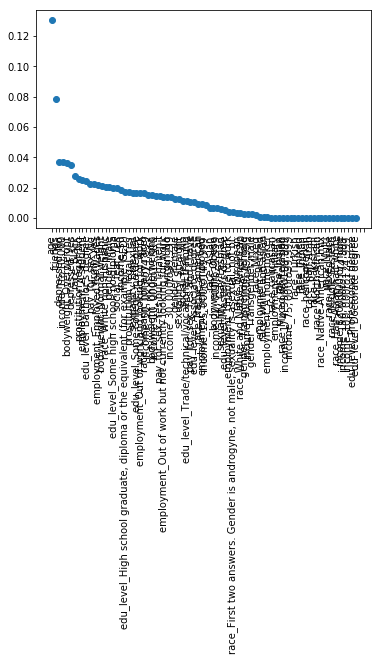

In [15]:
plot_feature_importances(model, X_variable_names)

# Iteration 2: Training the model with a balanced dataset

In [16]:
df_2 = df

negatives = df_2[df_2['attempt_suicide_Yes'] == 0]
positives = df_2[df_2['attempt_suicide_Yes'] == 1]
negatives.head()

,age,friends,gender_Female,gender_Male,gender_Transgender female,gender_Transgender male,sexuallity_Bisexual,sexuallity_Gay/Lesbian,sexuallity_Straight,income_$0,"income_$1 to $10,000","income_$10,000 to $19,999","income_$100,000 to $124,999","income_$125,000 to $149,999","income_$150,000 to $174,999","income_$174,999 to $199,999","income_$20,000 to $29,999","income_$200,000 or more","income_$30,000 to $39,999","income_$40,000 to $49,999","income_$50,000 to $74,999","income_$75,000 to $99,999",race_Asian,race_Black,race_European,...,pay_for_sex_Yes but I haven't,social_fear_No,social_fear_Yes,depressed_No,depressed_Yes,attempt_suicide_No,attempt_suicide_Yes,employment_A homemaker,employment_A student,employment_Employed for wages,employment_Military,employment_Out of work and looking for work,employment_Out of work but not currently looking for work,employment_Retired,employment_Self-employed,employment_Unable to work,edu_level_Associate degree,edu_level_Bachelor’s degree,edu_level_Doctorate degree,"edu_level_High school graduate, diploma or the equivalent (for example: GED)",edu_level_Master’s degree,edu_level_Professional degree,"edu_level_Some college, no degree","edu_level_Some high school, no diploma",edu_level_Trade/technical/vocational training
1,21,0.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,22,10.0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,19,8.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,23,10.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,22,2.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [17]:
number_of_samples = len(positives)
sliced_negatives = negatives.head(number_of_samples)

In [18]:
df_2 = pd.concat([sliced_negatives, positives])

In [19]:
df_2['attempt_suicide_Yes'].value_counts()

1    85
0    85
Name: attempt_suicide_Yes, dtype: int64

In [35]:
target_variables = ['attempt_suicide_No', 'attempt_suicide_Yes']
X = df_2.drop(target_variables, axis=1).values
y = df_2.iloc[:, df.columns == 'attempt_suicide_Yes'].values.ravel()

In [36]:
### Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [38]:
### Train model again

model_2 = RandomForestClassifier(random_state=0)
model_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [39]:
### Evaluate model
expected_2 = y_test
predicted_2 = model_2.predict(X_test)
report = metrics.classification_report(expected_2, predicted_2)

print("CLASSIFICATION REPORT")
print(report)

CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.68      0.71      0.70        21
          1       0.71      0.68      0.70        22

avg / total       0.70      0.70      0.70        43



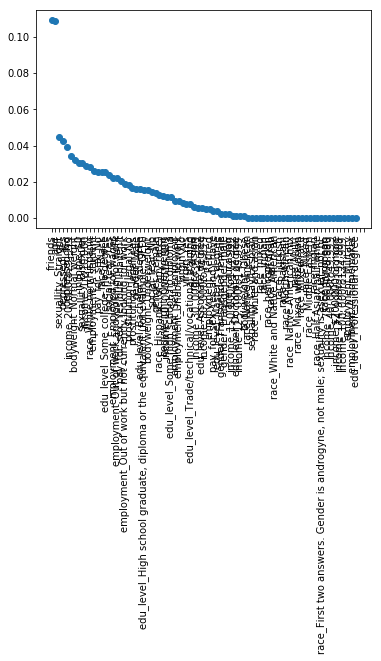

In [40]:
plot_feature_importances(model_2, X_variable_names)

## Iteration 3: Train full dataset with data normalization and dimensionality reduction

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [58]:
pipe_rfc = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=10)),
                     ('clf', RandomForestClassifier(random_state=0))])

pipe_rfc.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            ma...estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False))])

In [61]:
expected_3 = y_test
predicted_3 = pipe_rfc.predict(X_test)
report = metrics.classification_report(expected_3, predicted_3)
print(report)

             precision    recall  f1-score   support

          0       0.64      0.76      0.70        21
          1       0.72      0.59      0.65        22

avg / total       0.68      0.67      0.67        43

